In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
datatrain = pd.read_csv('Train.csv')
datatest = pd.read_csv('Test.csv')
datatrain = datatrain.drop(columns=["ID"])

In [2]:
datatrain = datatrain.drop(columns=["Provinsi"])

In [3]:
datatrain = datatrain.drop(columns=["Z1","Z2","Z3","Z4"])

In [4]:
datatrain

,KodeKabKot,Y,X1,X2,X3,X4,X5,X6
0,1101,0,1,27,0,0,1,1
1,1101,0,1,38,0,0,1,0
2,1101,0,0,36,0,0,0,1
3,1101,0,0,27,0,0,1,1
4,1101,0,1,36,1,0,0,0
...,...,...,...,...,...,...,...,...
13621,9471,1,0,28,1,0,1,1
13622,9471,0,1,22,1,1,1,1
13623,9471,0,0,35,1,0,1,1
13624,9471,0,0,27,1,0,1,1


In [5]:
kodekabkot = pd.get_dummies(datatrain['KodeKabKot'])

In [6]:
datatrain = datatrain.drop(columns=["KodeKabKot"])

In [7]:
datatrain = pd.concat([datatrain,kodekabkot],axis=1)

<AxesSubplot:xlabel='X2', ylabel='Count'>

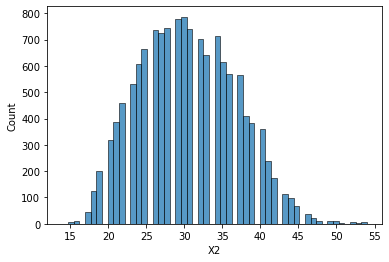

In [8]:
sns.histplot(datatrain.X2)

In [9]:
datatrain['X2'].describe()

count    13626.000000
mean        30.380229
std          6.357110
min         14.000000
25%         26.000000
50%         30.000000
75%         35.000000
max         54.000000
Name: X2, dtype: float64

In [10]:
#datatrain["X2"]= datatrain['X2'].replace([i for i in range(1,20)],0)
#datatrain[datatrain.X2 == 0].Y.value_counts()
#datatrain["X2"]= datatrain['X2'].replace([i for i in range(25,60)],1)
#datatrain[datatrain.X2 == 1].Y.value_counts()

In [45]:
datatrain = datatrain.drop(columns=['X2'])

In [46]:
datatrain 

,Y,X1,X3,X4,X5,X6,1101,1102,1103,1104,...,9428,9429,9430,9431,9432,9433,9434,9435,9436,9471
0,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13622,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13623,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13624,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datatrain.drop(columns="Y"), datatrain["Y"], test_size=0.33, random_state=1)

In [48]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6615521458750278

In [49]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      2658
           1       0.60      0.50      0.55      1839

    accuracy                           0.66      4497
   macro avg       0.65      0.64      0.64      4497
weighted avg       0.66      0.66      0.65      4497



In [134]:
from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
accuracy_score(y_test, y_pred)


0.6626639982210363

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      2658
           1       0.62      0.46      0.53      1839

    accuracy                           0.66      4497
   macro avg       0.65      0.63      0.63      4497
weighted avg       0.66      0.66      0.65      4497



In [136]:
tempt  = datatrain[datatrain['X2']>37]
tempt.Y.value_counts()

KeyError: 'X2'

In [42]:
tempt = datatrain[datatrain['Y']==0]
tempt

,Y,X1,X2,X3,X4,X5,X6,1101,1102,1103,...,9428,9429,9430,9431,9432,9433,9434,9435,9436,9471
0,0,1,27,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,38,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,27,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,36,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13619,0,0,39,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13620,0,0,31,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13622,0,1,22,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13623,0,0,35,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
tempt.X1.value_counts()

1    5158
0    2888
Name: X1, dtype: int64

In [44]:
tempt.X2.describe()

count    8046.000000
mean       30.366020
std         6.485889
min        14.000000
25%        25.000000
50%        30.000000
75%        35.000000
max        54.000000
Name: X2, dtype: float64

In [52]:
datatrain

,Y,X1,X3,X4,X5,X6,1101,1102,1103,1104,...,9428,9429,9430,9431,9432,9433,9434,9435,9436,9471
0,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13622,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13623,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13624,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5981765621525461

In [56]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75      2658
           1       0.77      0.03      0.05      1839

    accuracy                           0.60      4497
   macro avg       0.68      0.51      0.40      4497
weighted avg       0.67      0.60      0.46      4497



In [57]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier(random_state=100)
params = {
    'n_estimators':(50,100),
    'learning_rate':[0.5, 1]
}
gs = GridSearchCV(model, params)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
print('Best parameter: ', gs.best_params_)

Best parameter:  {'learning_rate': 0.5, 'n_estimators': 100}


In [58]:
abc = AdaBoostClassifier(learning_rate=0.5, n_estimators=200)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6095174560818324

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75      2658
           1       0.72      0.07      0.13      1839

    accuracy                           0.61      4497
   macro avg       0.66      0.53      0.44      4497
weighted avg       0.65      0.61      0.50      4497



In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [128]:
gbc = GradientBoostingRegressor(learning_rate=1, n_estimators=50)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred

array([0.21984722, 0.38848489, 0.90280661, ..., 0.45227292, 0.45227292,
       0.45227292])

In [129]:
y_pred[y_pred>=0.47] = 1

In [130]:
y_pred[y_pred<0.47] = 0

In [131]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [132]:
accuracy_score(y_test, y_pred)

0.6306426506559929

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      2658
           1       0.64      0.22      0.33      1839

    accuracy                           0.63      4497
   macro avg       0.64      0.57      0.54      4497
weighted avg       0.63      0.63      0.57      4497



In [62]:
model = GradientBoostingClassifier(random_state=100)
params = {
        'n_estimators':range(1,50),
        'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5, 1]
}
gs = GridSearchCV(model, params)
gs.fit(X_train, y_train)
print('Best parameter: ', gs.best_params_)

Best parameter:  {'learning_rate': 1, 'n_estimators': 49}


In [63]:
gbc = GradientBoostingClassifier(learning_rate=1, n_estimators=49)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred[y_pred>0.5] = 1

accuracy_score(y_test, y_pred)

0.6350900600400267

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75      2658
           1       0.64      0.24      0.35      1839

    accuracy                           0.64      4497
   macro avg       0.64      0.57      0.55      4497
weighted avg       0.64      0.64      0.58      4497

